In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

netflix = pd.read_csv ('/home/simplon/Documents/Cours hebdomadaire/Semaine 8/Python/netflix_titles.csv', index_col=0)
netflix.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...


In [28]:
#12. Afficher les directeurs qui ont produit le plus de films/séries disponibles sur Netflix

director = netflix["director"].dropna()
director = pd.Series(" ,".join(director).split(" ,")) 
director.value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
Martin Scorsese            9
Lance Bangs                8
David Dhawan               8
Johnnie To                 8
Shannon Hartman            7
dtype: int64

In [41]:
#13. Voir si Jan Suter travaille souvent avec les mêmes acteurs

donnes_a = netflix[netflix['director'].notna()==True]

donnees_jan_suter = donnes_a[donnes_a['director'].str.contains('Jan Suter')]
actor_c = ' ,'.join(donnees_jan_suter['cast'])
actor_c = pd.Series(actor_c.split(' ,'))
actor_c.value_counts().head(5)

Carlos Ballarta                                                                                    2
Sofía Niño de Rivera                                                                               2
Ricardo O'Farrill, Carlos Ballarta, Sofía Niño de Rivera, Chumel Torres, Marissa "Chabe" Lozano    1
Coco Celis, Raúl Meneses                                                                           1
Luciano Mellera                                                                                    1
dtype: int64

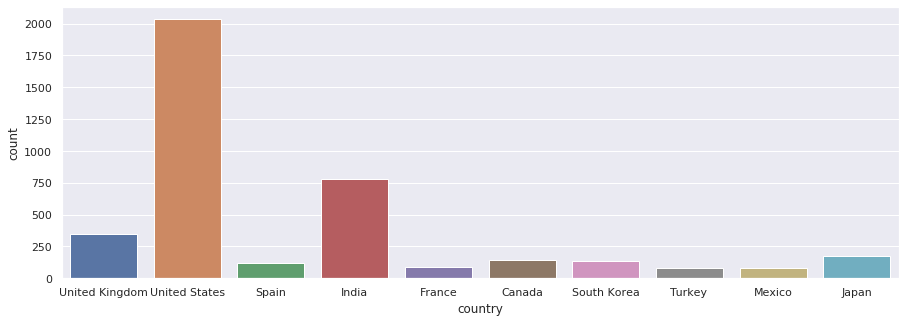

In [83]:
#14. Représenter les dix pays qui ont produit le plus de contenus disponibles sur Netflix, avec le nombre de contenus par pays

dfcountry = netflix['country'].value_counts().head(10)
#print(country)

topdix = netflix[netflix.country.isin(dfcountry.index)]
topdix

import seaborn as sns

plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
sns.countplot(x='country', data=topdix)

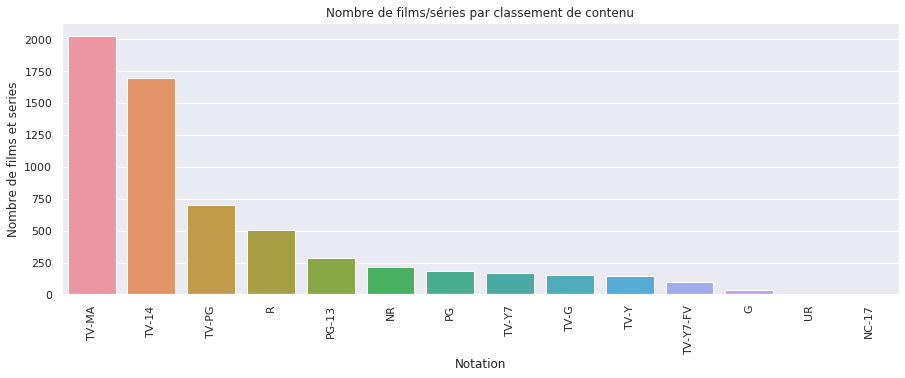

In [81]:
#15. Tracer un graphe à barres du nombre de films/séries par classement de contenu (rating)

plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
sns.countplot(x='rating', data=netflix, 
              order = netflix['rating'].value_counts().keys())
               
plt.title('Nombre de films/séries par classement de contenu')
plt.xlabel('Notation')
plt.ylabel('Nombre de films et series')
plt.xticks(rotation=90)
plt.show()

In [44]:
#16. Afficher l’évolution du nombre de films/séries disponibles sur Netflix au cours du temps

data = netflix[netflix['date_added'].notna()]
date_year = pd.to_datetime(data['date_added']).dt.year
date_year

show_id
81145628    2019
80117401    2016
70234439    2018
80058654    2018
80125979    2017
            ... 
80162994    2019
80186475    2019
70272742    2016
80067942    2016
70136122    2014
Name: date_added, Length: 6223, dtype: int64

In [45]:
netflix['year_added'] = date_year
netflix

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0
80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0
70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0
80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN
70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN
80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...,NaN


In [46]:
data_group = netflix.groupby(['type','year_added']).size().reset_index(name='Count')
data_group

,type,year_added,Count
0,Movie,2008.0,1
1,Movie,2009.0,2
2,Movie,2010.0,1
3,Movie,2011.0,13
4,Movie,2012.0,4
5,Movie,2013.0,6
6,Movie,2014.0,19
7,Movie,2015.0,58
8,Movie,2016.0,264
9,Movie,2017.0,913


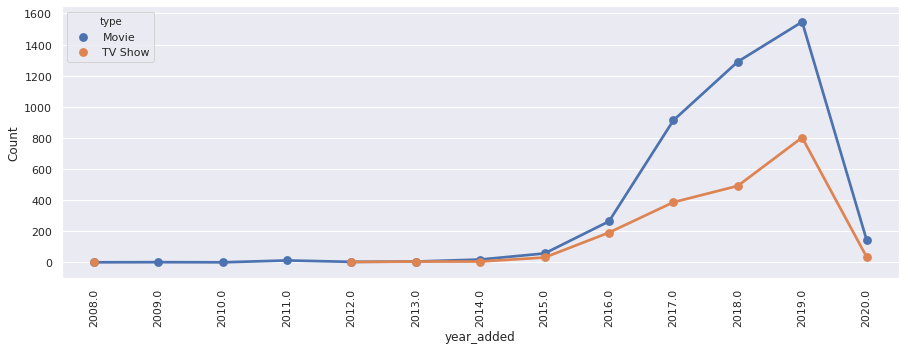

In [47]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.pointplot('year_added', 'Count', hue = 'type', data=data_group)

In [50]:
#17. Afficher la distribution de la durée des films disponibles sur Netflix

netflix[netflix.type == 'Movie']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0
80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017.0
80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...,2016.0
80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,2016.0
80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...,2016.0


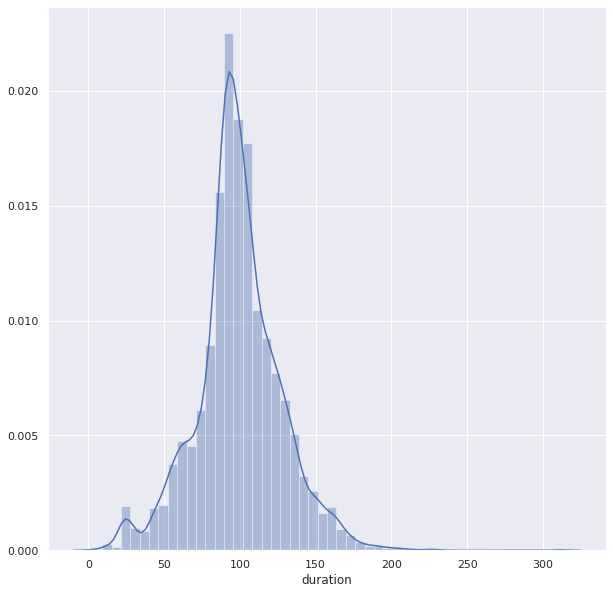

In [80]:
plt.figure(figsize=[10,10])

duree_film = netflix[netflix.type == 'Movie'].duration.str.replace('min', '').astype('int')
sns.distplot(duree_film)

In [56]:
#18. Tracer un graphique représentant le nombre de séries par modalité de nombre de saisons

tv_show = netflix[netflix.type == 'TV Show']
tv_show

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,,,
70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0
80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0
80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017.0
80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017.0
80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN
80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN
70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN


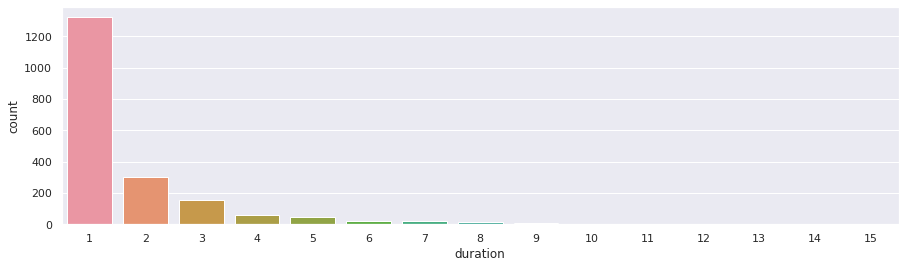

In [79]:
plt.figure(figsize=[15,4])
tv_show = netflix[netflix.type == 'TV Show'].duration.str.replace('Seasons', '').str.replace('Season', '').astype('int')
sns.countplot(tv_show)